In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/content/personalized_product_recommendation_data.csv")
df.head()

,Age,Income,SpendingScore,ProductViews,CartAdditions,CategoryInterest,BrandLoyalty,DiscountSensitivity,TimeOnSite,PreviousPurchases,AffinityScore
0,56,29930,17.930075,16,5,3,0.935205,0.279865,317.910495,35,0.332532
1,69,23285,43.160988,7,5,2,0.755810,0.107194,299.132133,41,0.383778
2,46,143637,19.530138,13,3,3,0.463377,0.520243,410.020652,2,0.577172
3,32,55863,77.557100,6,12,4,0.607053,0.806362,409.107638,4,0.521176
4,60,36704,47.962891,7,10,4,0.907522,0.306164,289.519153,12,0.375933


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10000 non-null  int64  
 1   Income               10000 non-null  int64  
 2   SpendingScore        10000 non-null  float64
 3   ProductViews         10000 non-null  int64  
 4   CartAdditions        10000 non-null  int64  
 5   CategoryInterest     10000 non-null  int64  
 6   BrandLoyalty         10000 non-null  float64
 7   DiscountSensitivity  10000 non-null  float64
 8   TimeOnSite           10000 non-null  float64
 9   PreviousPurchases    10000 non-null  int64  
 10  AffinityScore        10000 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 859.5 KB
None


In [ ]:
print(df.describe())

                Age         Income  SpendingScore  ProductViews  \
count  10000.000000   10000.000000   10000.000000  10000.000000   
mean      43.539400   84687.565900      50.910468      9.947500   
std       14.911636   37806.395263      28.674905      3.119698   
min       18.000000   20002.000000       1.015617      0.000000   
25%       31.000000   51528.250000      26.096196      8.000000   
50%       43.000000   84798.000000      51.003935     10.000000   
75%       56.000000  117423.500000      75.894626     12.000000   
max       69.000000  149999.000000      99.992558     25.000000   

       CartAdditions  CategoryInterest  BrandLoyalty  DiscountSensitivity  \
count   10000.000000      10000.000000  10000.000000         10000.000000   
mean        6.000800          5.020700      0.496102             0.502066   
std         2.043335          2.587999      0.289883             0.287398   
min         0.000000          1.000000      0.000115             0.000280   
25%        

In [ ]:
X = df.drop(columns=["AffinityScore"])
y = df["AffinityScore"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "R2 Score": round(r2, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4)
    })

results_df = pd.DataFrame(results)
results_df

,Model,R2 Score,MSE,RMSE
0,Linear Regression,0.3946,0.0085,0.0923
1,Ridge Regression,0.3946,0.0085,0.0923
2,Lasso Regression,0.3946,0.0085,0.0923
3,Random Forest,0.0651,0.0132,0.1147
4,XGBoost,0.3897,0.0086,0.0927


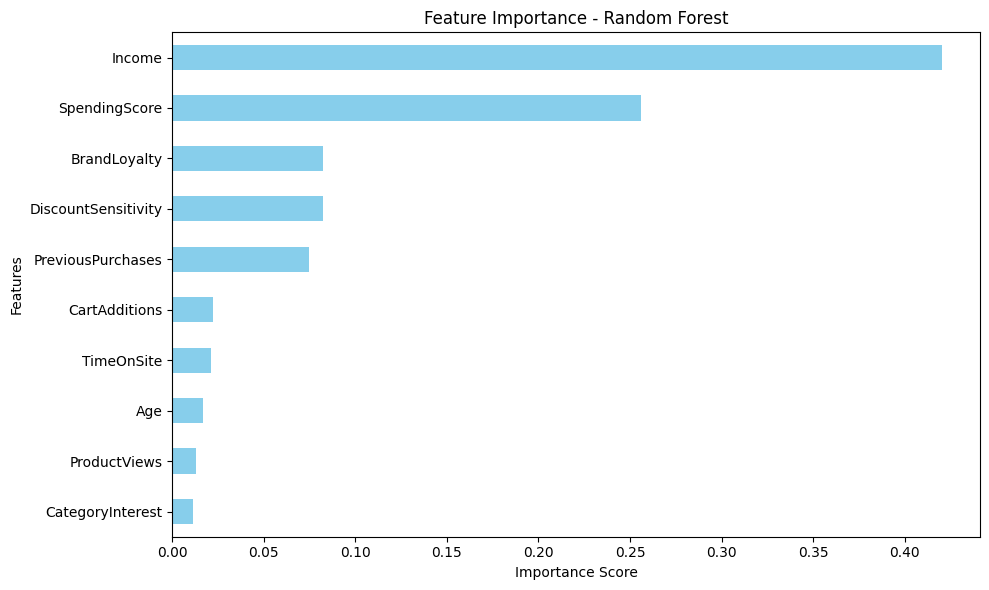

In [ ]:
# Feature Importance - Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf.sort_values(ascending=True).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation - Random Forest
cv_scores_rf = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X, y, cv=5, scoring='r2')
print("Random Forest CV R² scores:", np.round(cv_scores_rf, 4))
print("Mean CV R²:", round(np.mean(cv_scores_rf), 4))

Random Forest CV R² scores: [0.7853 0.8024 0.795  0.7885 0.7875]
Mean CV R²: 0.7917


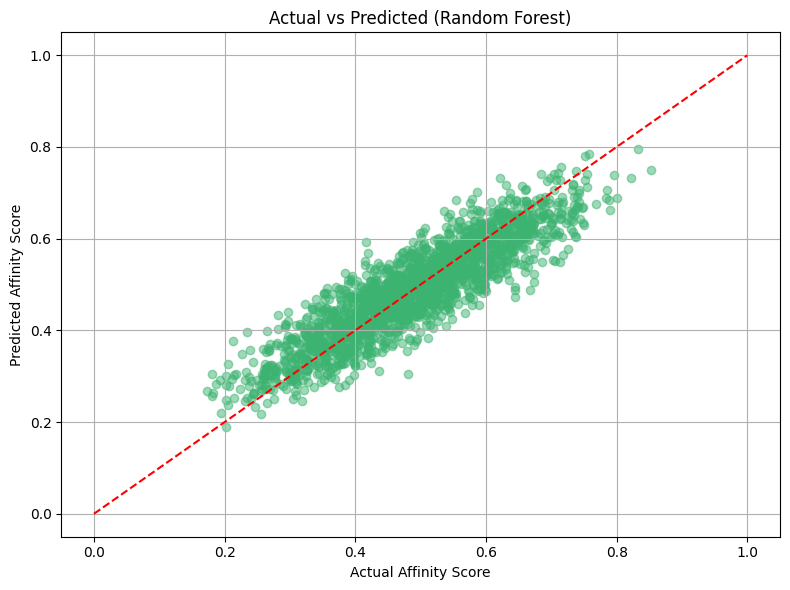

In [ ]:
# Predicted vs Actual for Random Forest
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="mediumseagreen")
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel("Actual Affinity Score")
plt.ylabel("Predicted Affinity Score")
plt.title("Actual vs Predicted (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

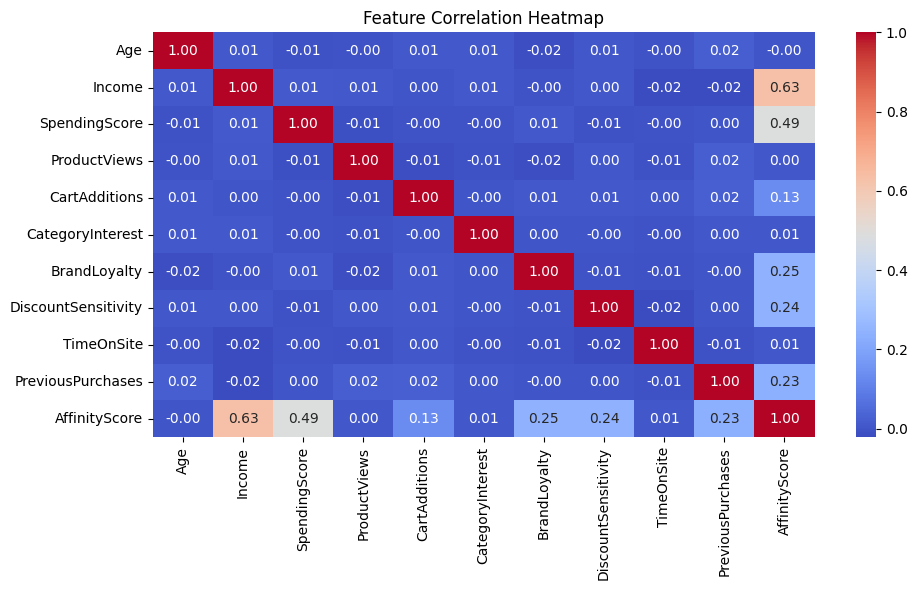

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()